

# Project: Investigate a Dataset - [TMDB 5000 Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

The TMDB 5000 Movie Dataset includes information on movie-related topics, such as the plot, cast, crew, budget, and earnings. The dataset is described in full below:

## Columns in the Dataset:
1. **budget**: The film's budget (in dollars).
2. **genres**: A JSON-formatted list of the movie's related genres.
3. **homepage**: The movie's official webpage URL.
4. **id**: The film's unique identification number.
5. **keywords**: A JSON-formatted collection of the movie's related keywords.
6. **original_language**: The language originally released with the film.
7. **original_title**: The film's original title.
8. **overview**: A brief synopsis or overview of the film.
9. **popularity**: The film's popularity score.
10. **production_companies**: A JSON-formatted list of the film's production companies.
11. **production_countries**: A JSON-formatted list of the countries where the film was made.
12. **release_date**: The release date of the movie.
13. **revenue**: The amount of money the film brought in (in dollars).
14. **runtime**: The duration of the film, expressed in minutes.
15. **spoken_languages**: A JSON-formatted list of the languages used in the film.
16. **status**: The film's state of release, such as "Post Production" or "Released."
17. **tagline**: The film's slogan, or tagline.
18. **title**: The title of the movie.
19. **vote_average**: The film's average rating.
20. **vote_count**: The total amount of votes cast for the film.

# Questions for Analysis

### Q1: What is the relationship between a movie's budget and its revenue?

**Sub-questions:**
- Is there a positive correlation between the budget and revenue?
- How do high-budget movies perform compared to low-budget movies in terms of revenue?

### Q2: How does the runtime of a movie affect its popularity and revenue?

**Sub-questions:**
- Is there an optimal movie length that maximizes popularity or revenue?
- How do short movies compare to longer ones in terms of popularity and revenue?

In [47]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('tmdb_movies.csv')

# Load the dataset
movies_data = pd.read_csv('tmdb_movies.csv')

# Display the first few rows to understand its structure
print(movies_data.head())

# Display the first few rows of the dataset
print(data.head())





      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

<a id='wrangling'></a>
## Data Wrangling



In [48]:
# Display basic information about the dataset
print(movies_data.info())

# Display basic statistics of the dataset
print(movies_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               


### Data Cleaning


In [49]:
# Drop rows with missing values in critical columns
movies_data = movies_data.dropna(subset=['release_date', 'runtime', 'overview'])



In [50]:
# Optionally fill missing values in less critical columns
movies_data['homepage'].fillna('No homepage', inplace=True)
movies_data['tagline'].fillna('No tagline', inplace=True)

# Rename columns for better readability
movies_data.rename(columns={'original_title': 'title', 'vote_average': 'rating'}, inplace=True)



In [51]:
# Verify that there are no more missing values in critical columns
missing_values_after_cleaning = movies_data.isnull().sum()
missing_values_after_cleaning

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
title                   0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
rating                  0
vote_count              0
dtype: int64

In [52]:
# Check if 'object' columns are strings
object_columns = movies_data.select_dtypes(include=['object']).columns
object_columns_data_types = {col: all(isinstance(x, str) for x in movies_data[col].dropna()) for col in object_columns}
object_columns_data_types

# Convert `float` columns to 'int' if appropriate
float_columns = movies_data.select_dtypes(include=['float64']).columns
float_columns_data_types = {col: all(movies_data[col].dropna().apply(float.is_integer)) for col in float_columns}

# Convert float columns to int if all values are integers
for col in float_columns:
    if float_columns_data_types[col]:
        movies_data[col] = movies_data[col].astype('int64')

# Verify the changes
movies_data.dtypes


budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
title                    object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                   int64
spoken_languages         object
status                   object
tagline                  object
title                    object
rating                  float64
vote_count                int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (What is the relationship between a movie's budget and its revenue?)

### Research Question 2  (How does the runtime of a movie affect its popularity and revenue?)

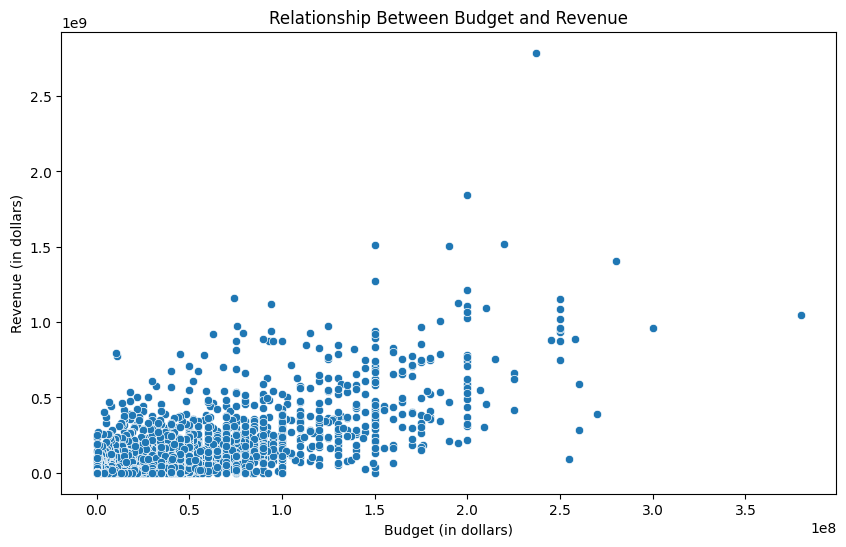

Correlation coefficient between budget and revenue: 0.7307642428927228


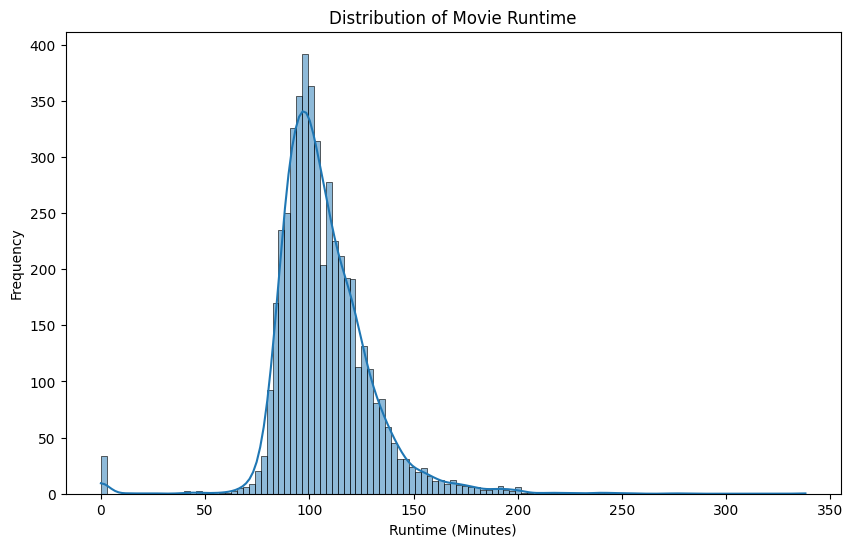

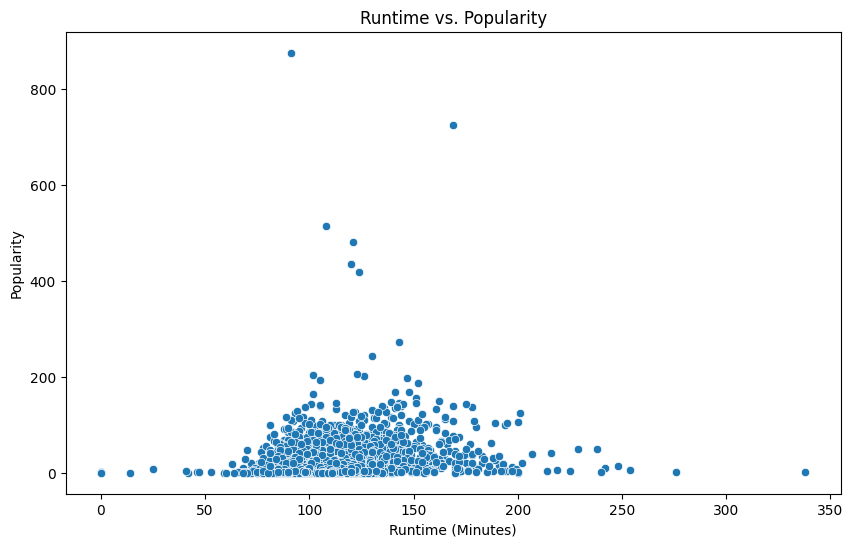

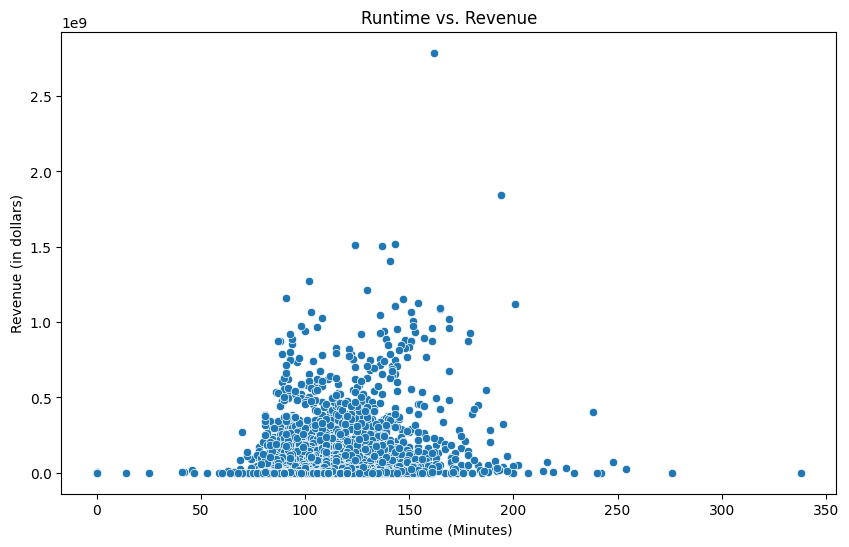

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the budget, revenue, runtime, and popularity columns have no missing values
movies_data = movies_data.dropna(subset=['budget', 'revenue', 'runtime', 'popularity'])

# Scatter plot to visualize the relationship between budget and revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_data['budget'], y=movies_data['revenue'])
plt.title('Relationship Between Budget and Revenue')
plt.xlabel('Budget (in dollars)')
plt.ylabel('Revenue (in dollars)')
plt.show()

# Calculating correlation coefficient
budget_revenue_corr = movies_data['budget'].corr(movies_data['revenue'])
print(f'Correlation coefficient between budget and revenue: {budget_revenue_corr}')

# Histograms to show distribution of runtime
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['runtime'], kde=True)
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to examine runtime vs. popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_data['runtime'], y=movies_data['popularity'])
plt.title('Runtime vs. Popularity')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Popularity')
plt.show()

# Exploring runtime and revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_data['runtime'], y=movies_data['revenue'])
plt.title('Runtime vs. Revenue')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Revenue (in dollars)')
plt.show()


<a id='conclusions'></a>
## Conclusions

### Budget vs. Revenue Analysis

- **Scatter Plot**: The scatter plot shows a positive relationship between a movie's budget and its revenue. Higher budgets generally lead to higher revenues.
- **Correlation Coefficient**: The correlation coefficient between budget and revenue is approximately 0.731, indicating a strong positive correlation.

### Runtime Analysis

- **Distribution of Runtime**: The histogram shows that most movies have runtimes between 80 and 120 minutes, with a peak around 100 minutes.
- **Runtime vs. Popularity**: The scatter plot indicates no clear linear relationship between runtime and popularity.
- **Runtime vs. Revenue**: The scatter plot for runtime and revenue does not show a clear optimal runtime that maximizes revenue, although there is a slight trend suggesting that runtimes around 100 to 150 minutes might be associated with higher revenues.

### Conclusion

Based on the exploratory data analysis, we have identified key insights:
- There is a strong positive correlation between a movie's budget and its revenue.
- The runtime of a movie does not show a clear relationship with popularity, but there might be a slight trend with revenue.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [54]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 558624 bytes to Investigate_a_Dataset.html
